#### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Informação
Erro:
- caminho_dados = "Database_GerenciamentoVendas\PCP_GerenciamentoVendas_PrevisoesVendas.csv"
Dados_PrevisaoVendas = pd.read_csv(caminho_dados)
- SyntaxWarning: invalid escape sequence '\P'
  caminho_dados = "Database_GerenciamentoVendas\PCP_GerenciamentoVendas_PrevisoesVendas.csv"

Solução:
Utilize: r"" ou (duas barras = \\) (no lugar\)
- caminho_dados = "Database_GerenciamentoVendas\\PCP_GerenciamentoVendas_PrevisoesVendas.csv"
- caminho_dados = r"Database_GerenciamentoVendas\PCP_GerenciamentoVendas_PrevisoesVendas.csv"


In [3]:
caminho_dados = "Database_GerenciamentoVendas\\PCP_GerenciamentoVendas_PrevisoesVendas.csv"
Dados_PrevisaoVendas = pd.read_csv(caminho_dados)

#### Selecionando os 4 primeiros dados do dataset
Para uma melhor observação

In [52]:
Dados_PrevisaoVendas.head(4)

,IdPrevisao,Produto,QuantidadePrevista,DataPrevista
0,1,ProdutoA,110,2024-01-23
1,2,ProdutoB,140,2024-01-24
2,3,ProdutoC,75,2024-01-25
3,4,ProdutoD,200,2024-01-26


#### Mostrando o total de linhas e colunas

In [5]:
linhas, colunas = Dados_PrevisaoVendas.shape
print(f"O Dataset possui um total de {linhas} linhas e {colunas} colunas")

O Dataset possui um total de 26 linhas e 4 colunas


In [6]:
Dados_PrevisaoVendas.describe()

,IdPrevisao,QuantidadePrevista
count,26.000000,26.000000
mean,13.500000,139.423077
std,7.648529,46.050558
min,1.000000,75.000000
25%,7.250000,110.000000
50%,13.500000,125.000000
75%,19.750000,175.000000
max,26.000000,240.000000


In [7]:
Dados_PrevisaoVendas.info()
print("==========================================")
print(f"Column = Colunas\n""Dtype = Tipo de dado:\nint64 = Inteiro\nobject= Varchar")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IdPrevisao          26 non-null     int64 
 1   Produto             26 non-null     object
 2   QuantidadePrevista  26 non-null     int64 
 3   DataPrevista        26 non-null     object
dtypes: int64(2), object(2)
memory usage: 964.0+ bytes
Column = Colunas
Dtype = Tipo de dado:
int64 = Inteiro
object= Varchar


In [8]:
Dados_PrevisaoVendas_QuantidadePrevista = Dados_PrevisaoVendas[Dados_PrevisaoVendas["QuantidadePrevista"]>0]
Dados_PrevisaoVendas_QuantidadePrevista = Dados_PrevisaoVendas_QuantidadePrevista.sort_values(by="QuantidadePrevista", ascending=False)
display(Dados_PrevisaoVendas_QuantidadePrevista)

,IdPrevisao,Produto,QuantidadePrevista,DataPrevista
13,14,ProdutoN,240,2024-02-05
8,9,ProdutoI,220,2024-01-31
23,24,ProdutoX,200,2024-02-15
3,4,ProdutoD,200,2024-01-26
16,17,ProdutoQ,200,2024-02-08
11,12,ProdutoL,180,2024-02-03
18,19,ProdutoS,180,2024-02-10
21,22,ProdutoV,160,2024-02-13
6,7,ProdutoG,160,2024-01-29
15,16,ProdutoP,150,2024-02-07


C:\Users\edils\AppData\Local\Temp\ipykernel_13348\3694470485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y='QuantidadePrevista', data=Dados_PrevisaoVendas_QuantidadePrevista, palette='viridis')


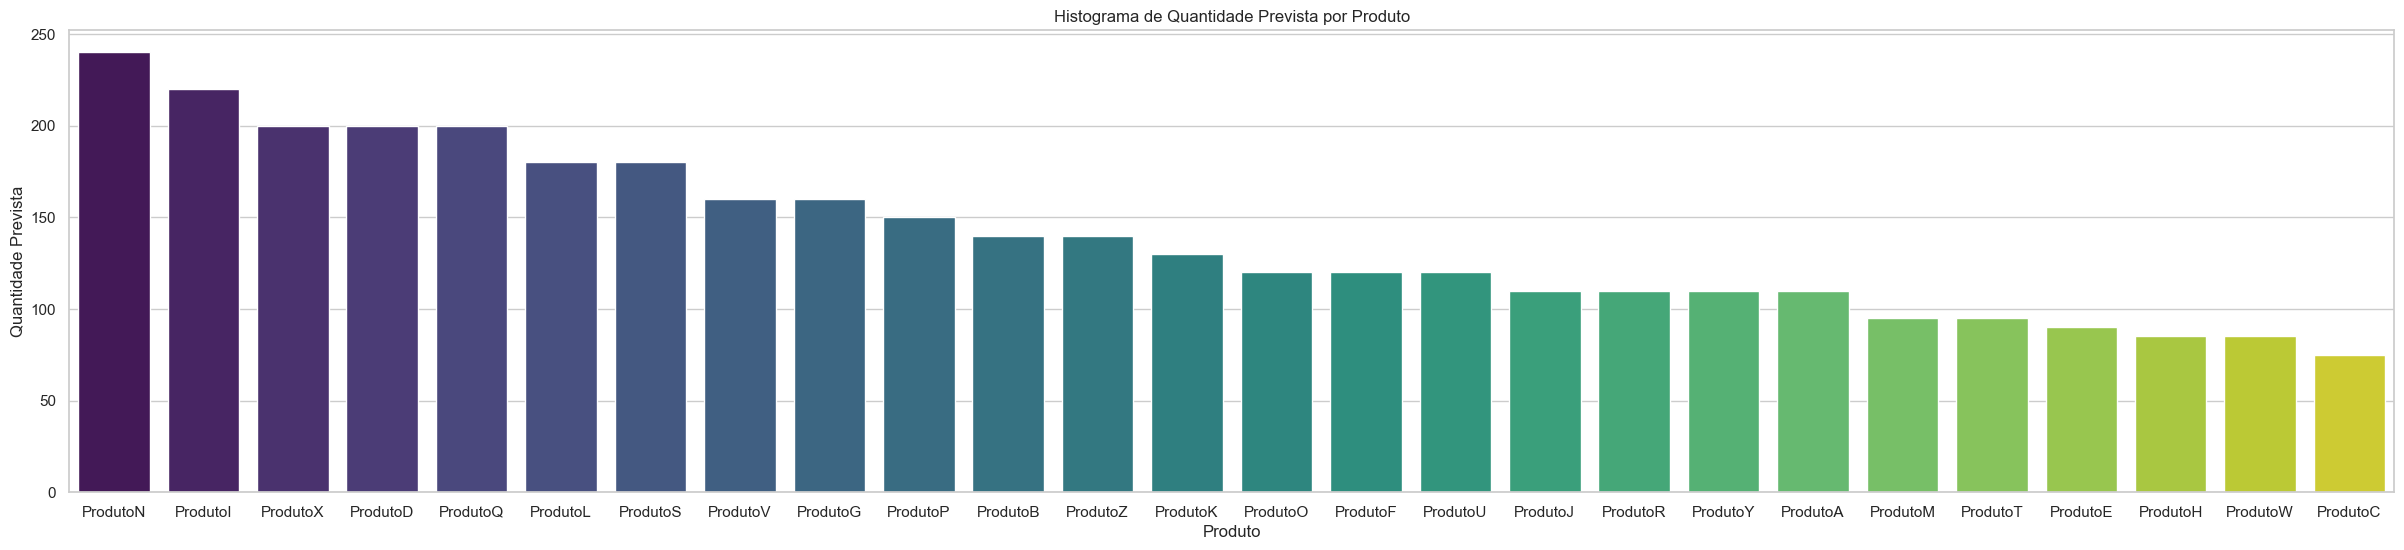

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 6))
sns.barplot(x='Produto', y='QuantidadePrevista', data=Dados_PrevisaoVendas_QuantidadePrevista, palette='viridis')
plt.xlabel('Produto')
plt.ylabel('Quantidade Prevista')
plt.title('Histograma de Quantidade Prevista por Produto')
plt.show()

#### Pegando a média de produtos a serem vendidos

In [43]:
Dados_PrevisaoVendas_QuantidadePrevista = Dados_PrevisaoVendas["QuantidadePrevista"].mean()
print(f"A média da coluna QuantidadePrevista é: {Dados_PrevisaoVendas_QuantidadePrevista}")



A média da coluna QuantidadePrevista é: 139.42307692307693


#### Ordenando a produção pelo dia 
Caso as informações estivessem não ordenadas

In [44]:
Dados_PrevisaoVendas["DataPrevista"] = pd.to_datetime(Dados_PrevisaoVendas["DataPrevista"])
Dados_PrevisaoVendas_QuantidadePrevista_Ordenado = Dados_PrevisaoVendas.sort_values(by="DataPrevista")
print(Dados_PrevisaoVendas_QuantidadePrevista_Ordenado)

    IdPrevisao   Produto  QuantidadePrevista DataPrevista
0            1  ProdutoA                 110   2024-01-23
1            2  ProdutoB                 140   2024-01-24
2            3  ProdutoC                  75   2024-01-25
3            4  ProdutoD                 200   2024-01-26
4            5  ProdutoE                  90   2024-01-27
5            6  ProdutoF                 120   2024-01-28
6            7  ProdutoG                 160   2024-01-29
7            8  ProdutoH                  85   2024-01-30
8            9  ProdutoI                 220   2024-01-31
9           10  ProdutoJ                 110   2024-02-01
10          11  ProdutoK                 130   2024-02-02
11          12  ProdutoL                 180   2024-02-03
12          13  ProdutoM                  95   2024-02-04
13          14  ProdutoN                 240   2024-02-05
14          15  ProdutoO                 120   2024-02-06
15          16  ProdutoP                 150   2024-02-07
16          17